# Project 5 -- Youngjun Suh

**TA Help:** John Smith, Alice Jones

- Help with figuring out how to write a function.
    
**Collaboration:** Friend1, Friend2
    
- Helped figuring out how to load the dataset.
- Helped debug error with my plot.

In [1]:
options(jupyter.rich_display = F)
options(repr.matrix.max.cols=25, repr.matrix.max.rows=200)

In [2]:
 myDF <- read.csv("/anvil/projects/tdm/data/election/escaped/itcont2020sample.txt", sep="|")

## Question 1

In [3]:
head(myDF)

  CMTE_ID   AMNDT_IND RPT_TP TRANSACTION_PGI IMAGE_NUM    TRANSACTION_TP
1 C00401224 N         YE                     2.020013e+17 24T           
2 C00401224 N         M4     P               2.020042e+17 24T           
3 C00193433 N         YE     P               2.020012e+17 15            
4 C00401224 N         YE                     2.020013e+17 24T           
5 C00401224 N         MY                     2.019073e+17 24T           
6 C00618371 N         Q3     P               2.019102e+17 15            
  ENTITY_TP NAME             CITY         STATE ZIP_CODE EMPLOYER    
1 IND       SOLOMON, VICTOR  CAPE CORAL   FL    33904    RETIRED     
2 IND       MYERS, ELIZABETH SCOTTSVILLE  NY    14546    NOT EMPLOYED
3 IND       HASKINS, GEORGE  HARTSDALE    NY    10530    NOT EMPLOYED
4 IND       KOLBE, NINA      WASHINGTON   DC    20003    SELF        
5 IND       ESSENBERG, PENNY GRAND RAPIDS MI    49534                
6 IND       GIEBEL, BETTY    KISSIMMEE    FL    34744    HOMEMAKER   

In [4]:
class(myDF$TRANSACTION_DT)

[1] "integer"

In [5]:
library(lubridate)

Warning message in system("timedatectl", intern = TRUE):
"running command 'timedatectl' had status 1"

Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union




In [6]:
myDF$newdates <- mdy(myDF$TRANSACTION_DT)

In [7]:
class(myDF$newdates)

[1] "Date"

In [8]:
head(myDF$newdates, n = 25)

 [1] "2019-07-11" "2020-03-04" "2019-12-18" "2019-08-30" "2019-03-21"
 [6] "2019-07-11" "2019-11-28" "2019-08-20" "2020-04-17" "2019-11-15"
[11] "2020-02-11" "2020-03-16" "2020-03-02" "2020-01-21" "2019-08-16"
[16] "2020-03-27" "2019-07-23" "2020-01-19" "2019-10-23" "2019-11-16"
[21] "2019-12-30" "2020-03-04" "2019-10-07" "2019-03-12" "2019-11-16"

In [9]:
# tapply will sum TRANSCATION_AMT based on the newdates category.

In [10]:
myresult <- tapply(myDF$TRANSACTION_AMT, myDF$newdates, sum)

In [11]:
table(head(sort(myDF$TRANSACTION_AMT, decreasing=TRUE), n=25))


  1000000   1050000   1085559   1250000   1333333   1380000   1415274   1500000 
        4         1         1         1         1         1         1         4 
  1800000   2000000   2500000   5000000   5941010  10000000  18000000  58000000 
        1         2         1         1         1         1         1         1 
 85000000 125000000 
        1         1 

In [12]:
length(sort(unique(myDF$newdates)))

[1] 596

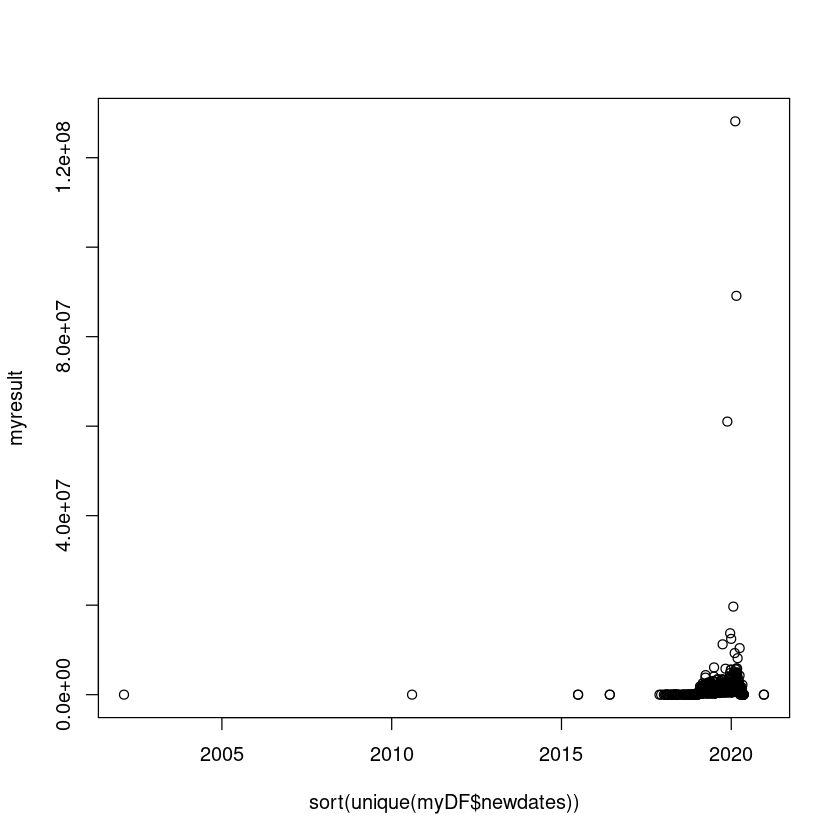

In [13]:
# sort will align dots when plotting the myresult
plot(sort(unique(myDF$newdates)), myresult)

a) Use the mdy function (from the lubridate library) on the column TRANSACTION_DT, to create a new column named newdates.

b) Using tapply, add the values in the TRANSACTION_AMT column, according to the values in the newdate column.

c) Plot the dates on the x-axis and the information we found in part b on the y-axis.

## Question 2

In [14]:
newDF <- subset(myDF, (newdates >= mdy("01/01/2019"))
                    & (newdates <= mdy("05/15/2019"))
               )

In [15]:
mynewresult <- tapply(newDF$TRANSACTION_AMT, newDF$newdates, sum)

In [18]:
tail(sort(mynewresult))

2019-02-28 2019-04-24 2019-04-30 2019-05-03 2019-03-29 2019-03-31 
   2542423    2626638    2663527    2750129    3811357    4369255 

In [20]:
length(sort(unique(newDF$newdates)))

[1] 135

In [22]:
length(mynewresult)

[1] 135

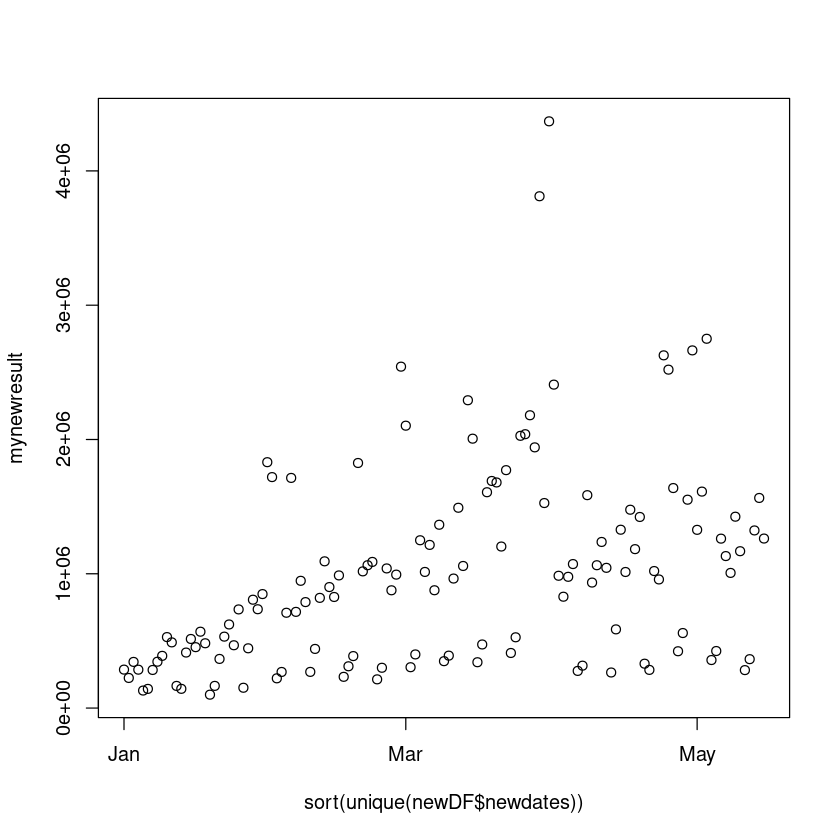

In [23]:
plot(sort(unique(newDF$newdates)), mynewresult)

a) Create a new dataframe that only contains data for the dates in the range 01/01/2019-05/15/2019

b) Plot the new dataframe

c) What do you notice about the data?
 Maybe more donations during weekend than donations during weekdays.

## Question 3

In [24]:
stateresult <- tapply(myDF$TRANSACTION_AMT, myDF$STATE, sum)

In [28]:
# categorized sum of donations by states
stateresult

                 AA        AB        AE        AK        AL        AP        AR 
   431548     32243      1474     87137   1627993   7195054     49240   5690116 
       AS        AZ        BC        CA        CO        CT        DC        DE 
     2908  11750510     12083 151842431  18025653  12065158  37280905   2120061 
       FL        FM        GA        GU        HI        IA        ID        IL 
 44118779      2250  17026567     78087   1730014   4291247   1626126  27940911 
       IN        KS        KY        LA        MA        MB        MD        ME 
  8906170   4311170   4440149   6202190  32308431       213  14940848   3393310 
       MH        MI        MN        MO        MP        MS        MT        NB 
     5000  15933204   9990430   7123990     10098   1844410   2389091       417 
       NC        ND        NE        NH        NJ        NL        NM        NS 
 13368140   1665152   2418525   2970383  16327791       909   4137547       678 
       NT        NV        N

In [29]:
head(myDF$CITY)

[1] "CAPE CORAL"   "SCOTTSVILLE"  "HARTSDALE"    "WASHINGTON"   "GRAND RAPIDS"
[6] "KISSIMMEE"   

In [30]:
head(myDF$STATE)

[1] "FL" "NY" "NY" "DC" "MI" "FL"

In [31]:
# paste() will pair up two parameters seperated by a regex (=sep)
myDF$citystatepair <- paste(myDF$CITY, myDF$STATE, sep=", ")

In [32]:
cityDonations <- tapply(myDF$TRANSACTION_AMT, myDF$citystatepair, sum)

In [39]:
head(sort(cityDonations, decreasing=TRUE), n=55)

     NEW YORK, NY SAN FRANCISCO, CA    WASHINGTON, DC   LOS ANGELES, CA 
        331576505          38701698          37152618          14141160 
      HOUSTON, TX        DALLAS, TX       CHICAGO, IL        BOSTON, MA 
         12463126          11642460          11032607           8287423 
      ATLANTA, GA       SEATTLE, WA   SAN ANTONIO, TX     LAS VEGAS, NV 
          7141597           7115650           6467233           5699480 
       DENVER, CO        AUSTIN, TX      BROOKLYN, NY     ARLINGTON, VA 
          5643729           5555237           5416132           5217976 
  BALA CYNWYD, PA     PALO ALTO, CA  PHILADELPHIA, PA     GREENWICH, CT 
          5143506           4975339           4357885           3942437 
  LITTLE ROCK, AR     SAN DIEGO, CA     LOS ALTOS, CA    ALEXANDRIA, VA 
          3721642           3517005           3490996           3338608 
      OAKLAND, CA    PALM BEACH, FL    CINCINNATI, OH      PORTLAND, OR 
          3230719           3211946           28958

In [40]:
tail(sort(cityDonations, decreasing=TRUE), n=55)

         ARLINGTON, DC             SALYER, CA       W. HOLLYWOOD, CA 
                  -475                   -489                   -491 
     BELGRADE LAKE, ME         CALLISTOGA, CA      LAKE HAMILTON, FL 
                  -500                   -500                   -500 
     LINCOLN CITY,, OR         LITTLSTOWN, PA NORTH READING,  MA, MA 
                  -500                   -500                   -500 
            OBRIEN, OR             REGINA, ZZ                VAB, VA 
                  -500                   -500                   -500 
              YORK, MD           CLERMONT, GA        RIDGE MANOR, FL 
                  -500                   -549                   -563 
            ALPINE, AL                GPP, MI           YORKTOWN, NY 
                  -646                   -700                   -706 
           HARFORD, PA           RICHLAND, IN          BLUEWATER, NM 
                  -743                   -845                   -869 
     YORKTOWN HGTS, 

a) Find the sum of the total donations contributed in each state.

b) Create a new column that pastes together the city and state.

c) Find the total donation amount for each city/state location. In the output do you notice anything suspicious in the result? How do you think that occured?
 Misspelling city names and missing cities are causing some problems.

## Question 4

In [43]:
# comma seperated names
head(myDF$NAME, n=55)

 [1] "SOLOMON, VICTOR"            "MYERS, ELIZABETH"          
 [3] "HASKINS, GEORGE"            "KOLBE, NINA"               
 [5] "ESSENBERG, PENNY"           "GIEBEL, BETTY"             
 [7] "GRISMORE, STEVE"            "POCIECHA-PALM, CAROL"      
 [9] "DICE, KEVIN"                "KULSTAD, ERIK"             
[11] "SMELLEY, KAY MS."           "WELLMAN, NANCY"            
[13] "WARD, KATHLEEN A. MRS."     "GIBLIN, KATHLEEN"          
[15] "KELLEY, PATRICK RUSTON MR." "WILSON, RICHARD J"         
[17] "DRUMMOND, F FORD MR."       "KROKEN, DUANE"             
[19] "BIRD, KENNETH"              "FALCHUK, EVAN"             
[21] "MESELE, SAMSON"             "HAWKINS, FRANK"            
[23] "KNOX, RICHARD G. MR."       "MOORE, JOAN"               
[25] "MCNULTY, KELLY"             "HUDSON, PEGGY M"           
[27] "ASMUS, GINGER"              "ELLINGSEN, PAUL"           
[29] "BRENEMAN, JAY"              "LEVEN, SEYMOUR"            
[31] "LUTZ, CHRISTOPHER"          "MILLER, VALERIE"    

In [42]:
class(myDF$NAME)

[1] "character"

In [46]:
sum(grepl(", DON", head(myDF$NAME, n=55)))

[1] 2

In [51]:
sum(grepl("ISABELLE", myDF$NAME))

[1] 347

In [52]:
sum(myDF$TRANSACTION_AMT[grepl("ISABELLE", myDF$NAME)])

[1] 41181

In [54]:
sum(myDF$TRANSACTION_AMT[grepl("MARY", myDF$NAME)])

[1] 7753892

a) Find the type of data that is in the NAME columm

b) Split up the names in the NAME column, to extract the first names of the donors. (This will not be perfect, but it is our first attempt.)

c) How much money is donated (altogether) by people named Mary?
 $7753892

## Question 5

In [ ]:
# code here

In [55]:
head(sort(myDF$EMPLOYER), n=50)

 [1] "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" ""
[26] "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" ""

In [56]:
tail(sort(myDF$EMPLOYER), n=50)

 [1] "`UCLA"                                 
 [2] "`UCLA"                                 
 [3] "`UCLA"                                 
 [4] "`UCLA"                                 
 [5] "`UCLA"                                 
 [6] "`UCLA"                                 
 [7] "`UCLA"                                 
 [8] "`UCLA"                                 
 [9] "`UCLA"                                 
[10] "`UCLA"                                 
[11] "`UCLA"                                 
[12] "`UCLA"                                 
[13] "`UCLA"                                 
[14] "`UCLA"                                 
[15] "`UCLA"                                 
[16] "`UCLA"                                 
[17] "`UCLA"                                 
[18] "`UCLA"                                 
[19] "`UCLA"                                 
[20] "`UCLA"                                 
[21] "`UCLA"                                 
[22] "`UCLA"                      

In [59]:
sum(myDF$TRANSACTION_AMT[myDF$EMPLOYER == "NOT EMPLOYED"], na.rm=TRUE)

[1] 79250204

In [64]:
employed <- sum(myDF$TRANSACTION_AMT[myDF$EMPLOYER == "EMPLOYED"], na.rm=TRUE)

In [72]:
notemployed <- sum(myDF$TRANSACTION_AMT[(myDF$EMPLOYER != "NOT EMPLOYED") & (myDF$EMPLOYER != "NONE")], na.rm=TRUE)

In [68]:
tempV <- c(notemployed, employed)

In [73]:
tempV

NOT EMPLOYED     EMPLOYED 
   959563350        12418 

In [70]:
names(tempV) <- c("NOT EMPLOYED", "EMPLOYED")

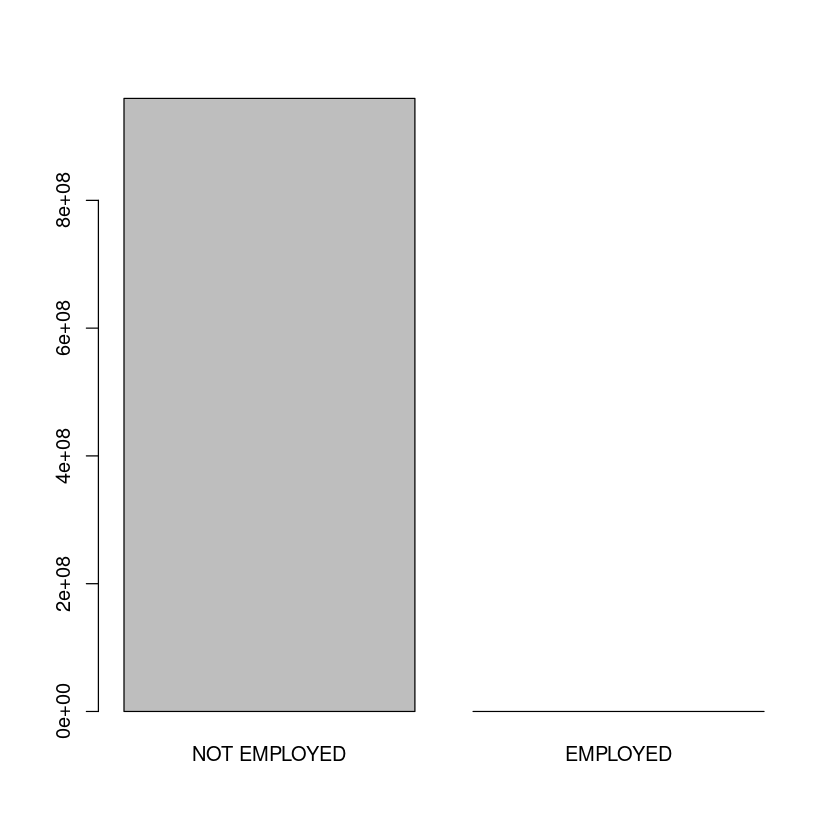

In [71]:
barplot(tempV)

In [77]:
head(sort(tapply(myDF$TRANSACTION_AMT, myDF$OCCUPATION, sum), decreasing=TRUE), n=55)

                FOUNDER                 RETIRED            NOT EMPLOYED 
              279442327                98774206                84855951 
                                       ATTORNEY                     CEO 
               77364020                31326953                25055647 
 PRESIDENTIAL CANDIDATE               PRESIDENT               EXECUTIVE 
               24824136                20209278                15546942 
              HOMEMAKER               PHYSICIAN                   OWNER 
               14058507                13817398                12575604 
               CHAIRMAN              CONSULTANT                INVESTOR 
               11826480                 9058121                 8729393 
      MANAGING DIRECTOR                 PARTNER                    NONE 
                8011054                 7260455                 6351143 
            REAL ESTATE                  LAWYER                ENGINEER 
                6265870                 6171634    

In [105]:
head(newDF$STATE[grepl("", newDF$OCCUPATION)])

[1] "MOORE, JOAN"            "SMITH, NATHALIE E. MS." "MOONEY, ROBERT"        
[4] "GOTTESDIENER, ROBYN"    "O'NEIL, ROBERTA"        "ANDERSON, CAROL H. MS."

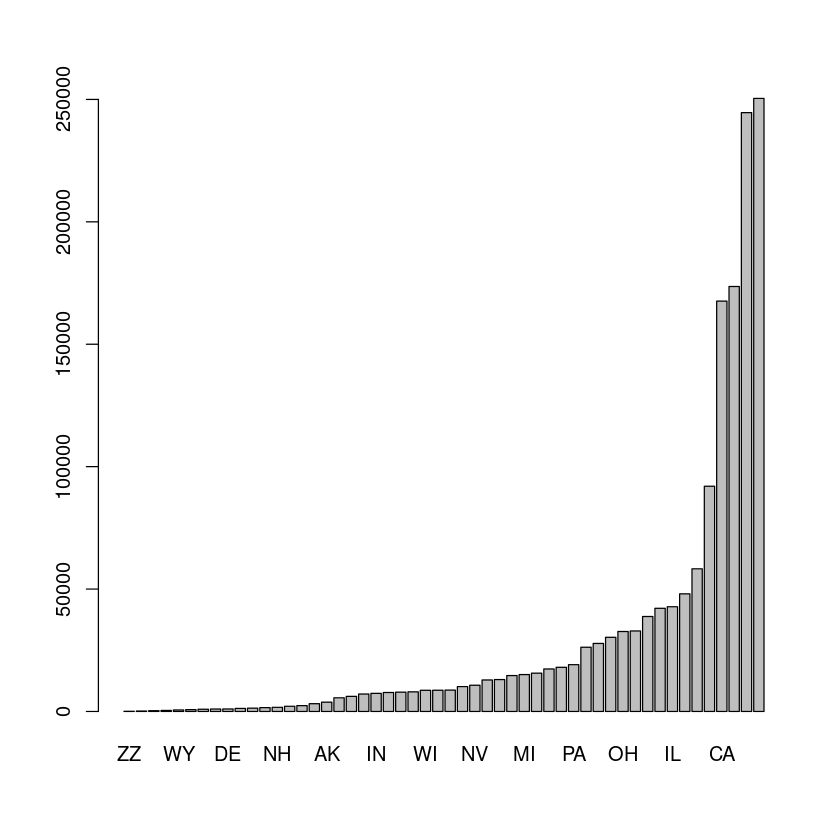

In [117]:
barplot(sort(tapply(newDF$TRANSACTION_AMT[grepl("FOUNDER | PRESIDENT | CEO | CHAIRMAN", newDF$OCCUPATION)]
                   , newDF$STATE[grepl("FOUNDER | PRESIDENT | CEO | CHAIRMAN", newDF$OCCUPATION)]
                   , sum
                   )
            )
       )

a) Using a barplot or dotchart, show the total amount of donations made by EMPLOYED vs NOT EMPLOYED individuals

b) What is the category of occupation that donates the most money?
    Founders of company (obvious right?)

c) Plot something that you find interesting about the employment and/or occupation columns
    A lot of poor and socially high ranked are in ZZ, WY, DE, NH, AK while rich and socially high ranked are in IL, CA. Makes sense because there are a lot of big tech companies in CA. 

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.